Title:- Wine Quality Prediction


Description: 

The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.



In [16]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the data
df = pd.read_csv('WineQT.csv')

# Display basic information
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlor

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Quality value counts:
 quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


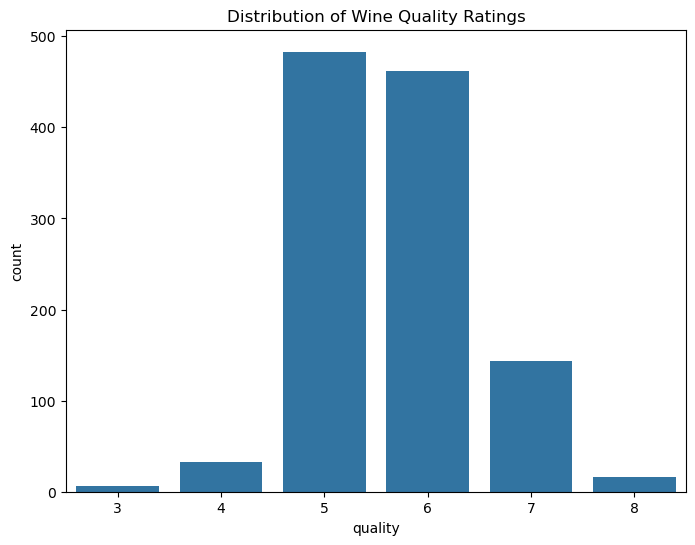

In [17]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop the 'Id' column as it's not a feature
df = df.drop('Id', axis=1)

# Check the distribution of the target variable (quality)
print("Quality value counts:\n", df['quality'].value_counts())

# Visualize the quality distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

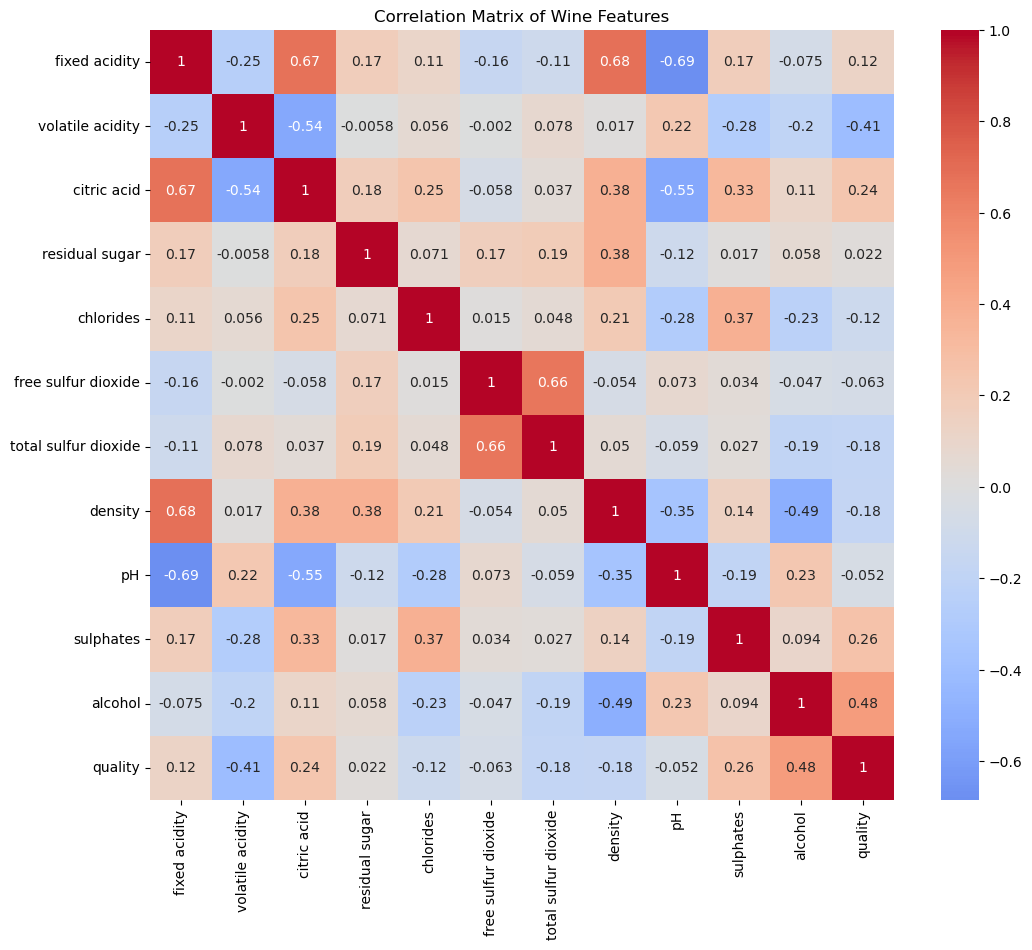

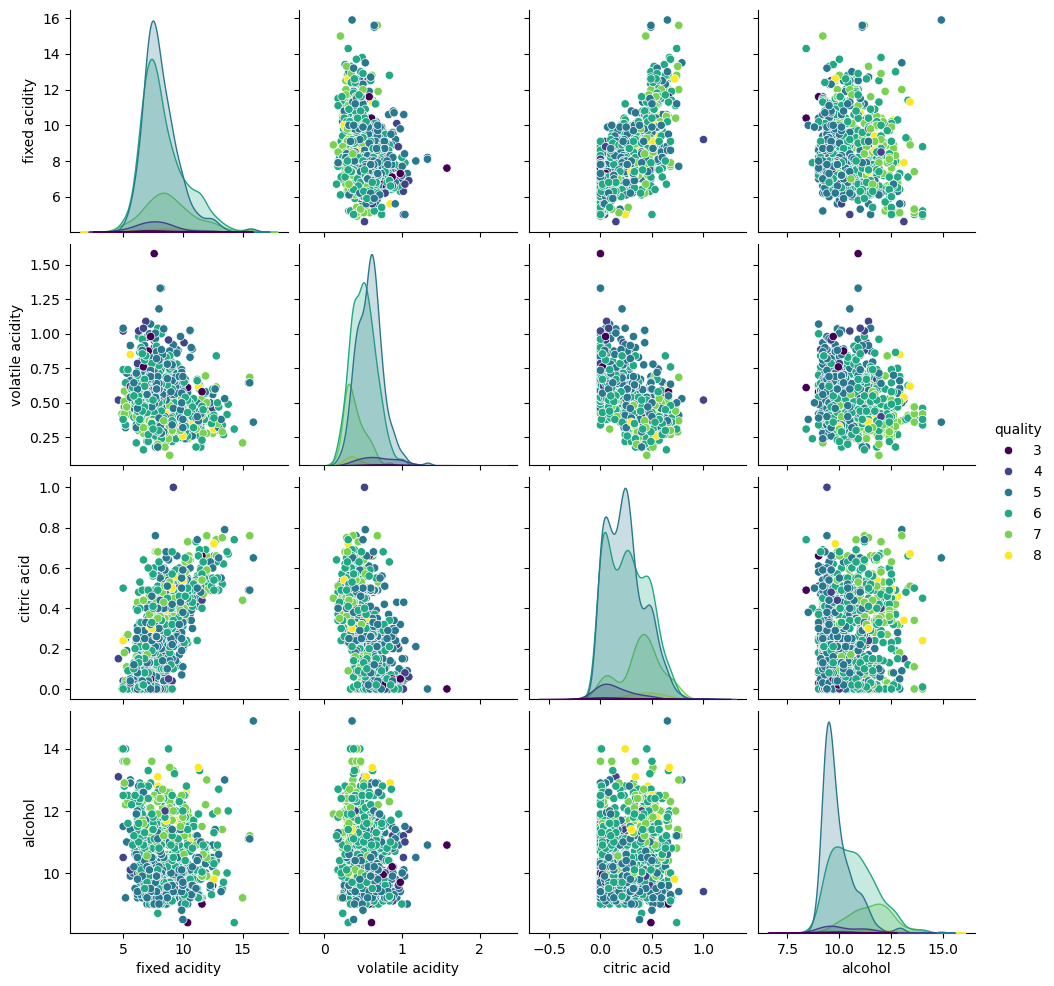

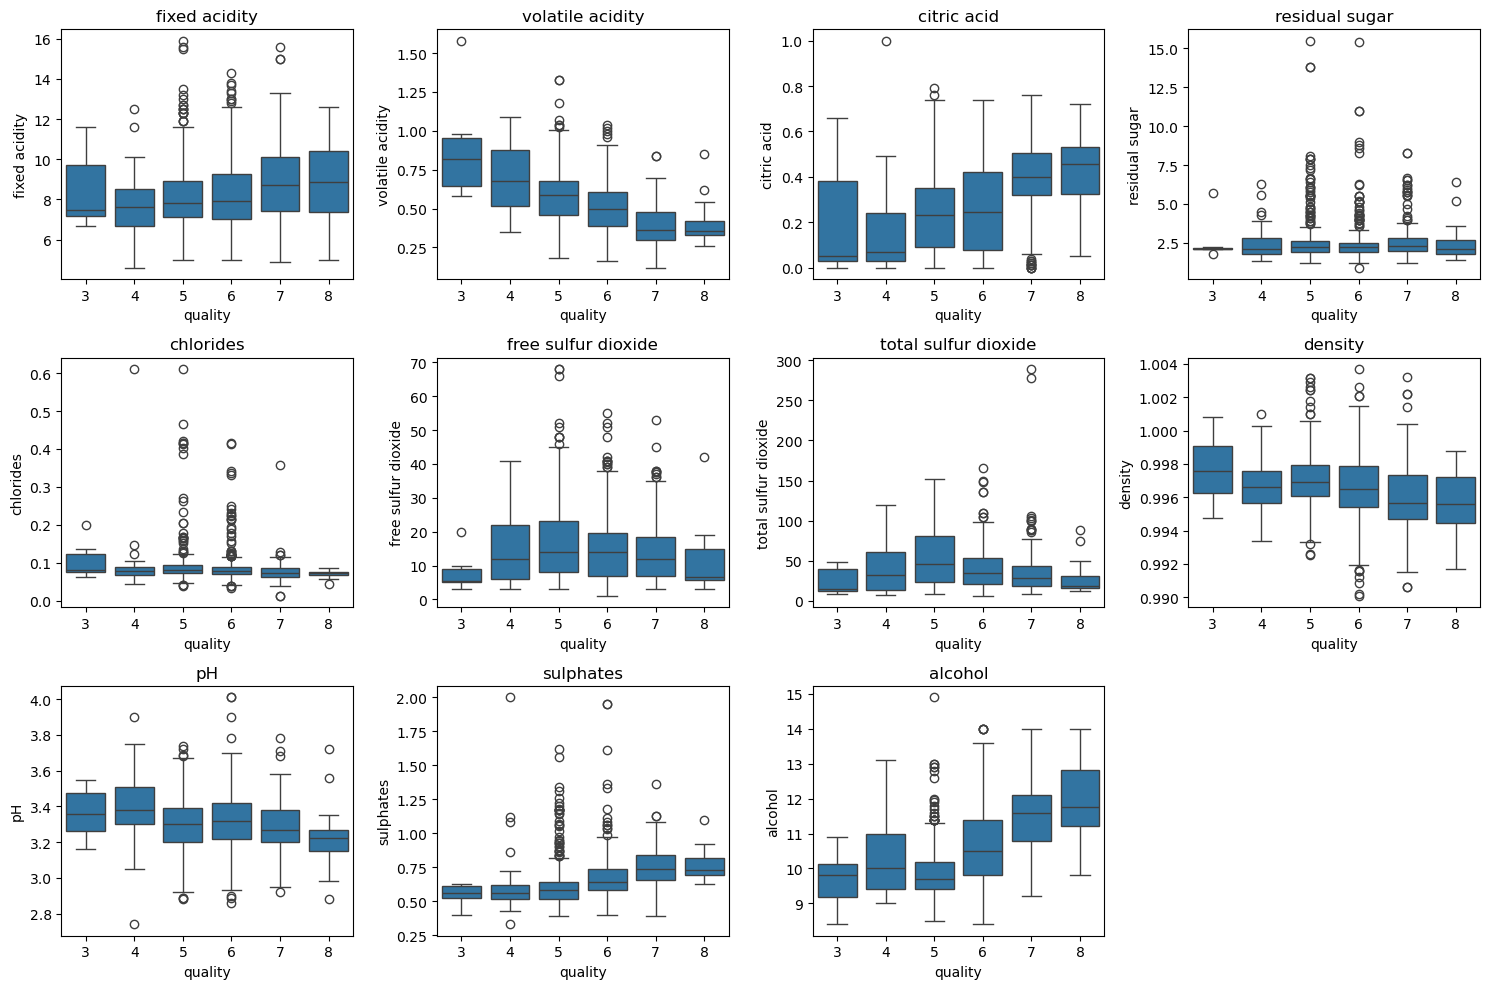

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features')
plt.show()

# Pairplot of selected features
sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']], 
             hue='quality', palette='viridis')
plt.show()

# Boxplots of features against quality
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Exclude quality
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='quality', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

In [19]:
# Create binary classification (good/bad wine) for simplicity
# Let's consider wines with quality >= 7 as good (1) and <7 as bad (0)
df['quality_class'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Check the new distribution
print("Quality class distribution:\n", df['quality_class'].value_counts())

# Separate features and target
X = df.drop(['quality', 'quality_class'], axis=1)
y = df['quality_class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Quality class distribution:
 quality_class
0    984
1    159
Name: count, dtype: int64


Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       197
           1       0.79      0.59      0.68        32

    accuracy                           0.92       229
   macro avg       0.86      0.78      0.82       229
weighted avg       0.92      0.92      0.92       229

Accuracy: 0.9213973799126638


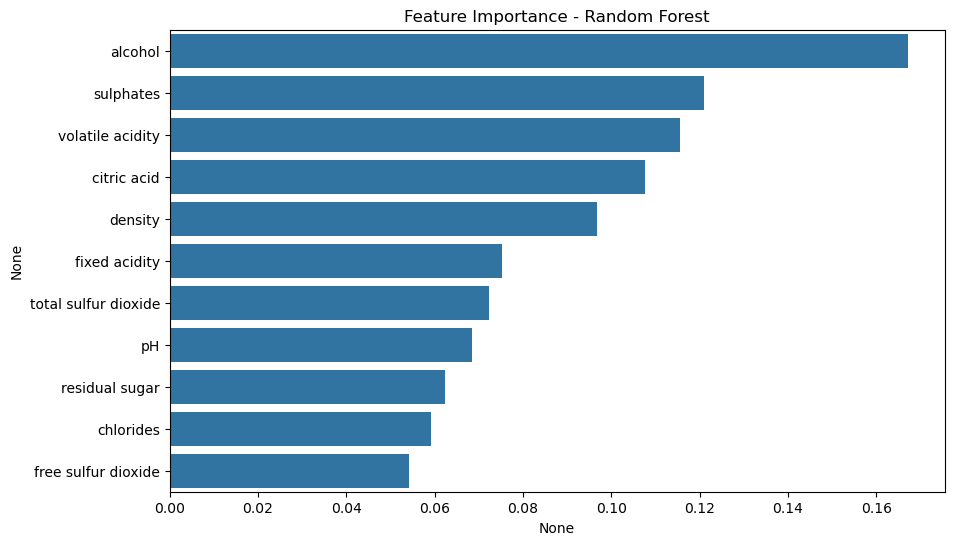

In [20]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance - Random Forest')
plt.show()

In [21]:
# SGD Classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

print("\nSGD Classifier Results:")
print(classification_report(y_test, y_pred_sgd))
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))


SGD Classifier Results:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       197
           1       0.57      0.62      0.60        32

    accuracy                           0.88       229
   macro avg       0.75      0.77      0.76       229
weighted avg       0.89      0.88      0.88       229

Accuracy: 0.8820960698689956


In [22]:
# SVC
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

print("\nSVC Results:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))


SVC Results:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.76      0.41      0.53        32

    accuracy                           0.90       229
   macro avg       0.84      0.69      0.74       229
weighted avg       0.89      0.90      0.89       229

Accuracy: 0.8995633187772926


C:\Users\user ashu\AppData\Local\Temp\ipykernel_2936\793869131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


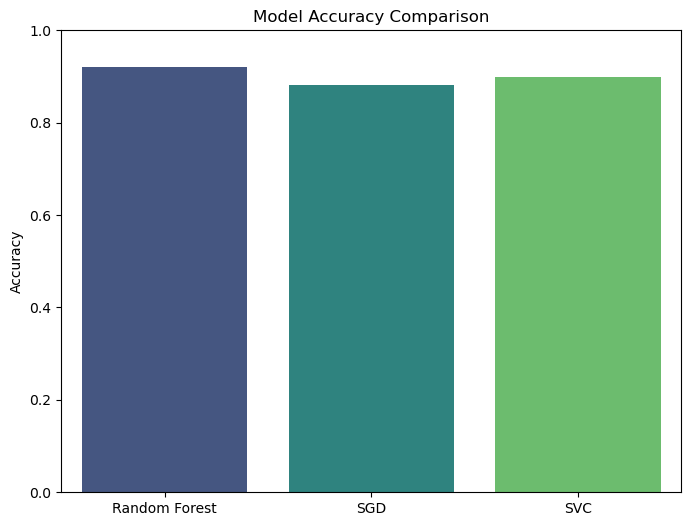

In [24]:
# Compare model accuracies
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_sgd),
              accuracy_score(y_test, y_pred_svc)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()